In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [5]:
url = "https://raw.githubusercontent.com/kanblin/urban-octo-garbanzo/main/realest.csv"
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of      Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
152   44.0      3.0   820.0   5.0  27.0     NaN       1.0     0.0        1.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0
156    NaN      NaN     NaN   NaN   NaN     NaN       NaN     NaN        NaN

[157 rows x 9 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,156.0,56.474359,12.875307,32.0,46.00,55.0,65.0,90.0
Bedroom,156.0,3.166667,1.348037,1.0,2.00,3.0,4.0,8.0
Space,146.0,1097.246575,462.540698,539.0,805.25,965.5,1220.5,2295.0
Room,156.0,6.500000,1.675247,4.0,5.00,6.0,7.0,12.0
Lot,146.0,32.808219,8.457859,24.0,25.00,30.0,37.0,50.0
Tax,147.0,911.707483,443.263430,418.0,652.50,821.0,1012.5,2752.0
Bathroom,156.0,1.480769,0.529408,1.0,1.00,1.5,2.0,3.0
Garage,156.0,0.846154,0.808454,0.0,0.00,1.0,1.5,2.0
Condition,156.0,0.230769,0.422682,0.0,0.00,0.0,0.0,1.0


In [8]:
df.isna().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [9]:
for col in df.columns:
    if col in ['Space', 'Tax', 'Lot', 'Price']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].median())

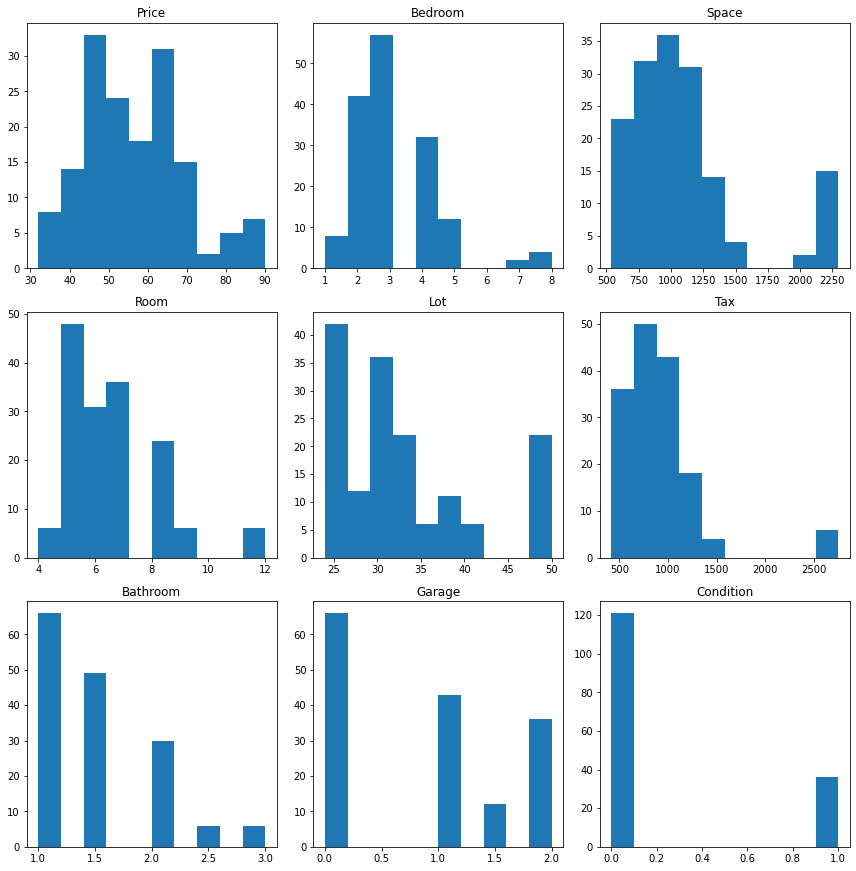

In [10]:
list_columns = list(df.columns)
plt.figure(figsize = (12,20))
for i in range(len(list_columns)):
    plt.subplot(5, 3, i + 1)
    plt.title(list_columns[i])
    plt.hist(df[list_columns[i]])
    
plt.tight_layout()

<AxesSubplot:>

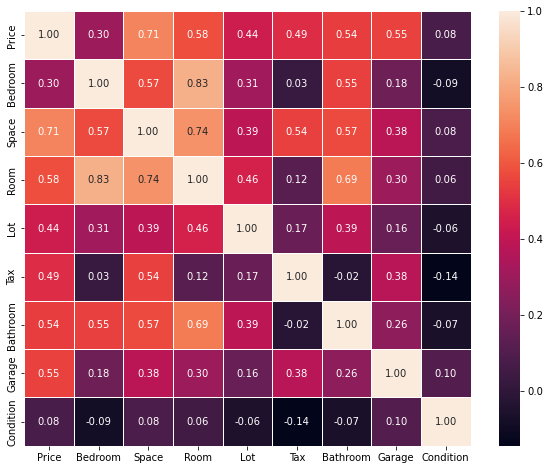

In [11]:
corr = df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.5)

In [50]:
target_column = 'Price'
# Calculate the baseline prediction as the mean of the target variable
baseline_prediction = df[target_column].mean()

# Create a NumPy array for the baseline predictions (for comparison with test_labels)
baseline_preds = np.full_like(df[target_column], fill_value=baseline_prediction)

# Calculate baseline errors and display average baseline error
baseline_errors = abs(baseline_preds - df[target_column])
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  10.41


In [12]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
def calculate_mse(data, target_column='Price'):
    if len(data) == 0:
        return 0
    mean_value = data[target_column].mean()
    return ((data[target_column] - mean_value) ** 2).sum() / len(data)

def split_data(data, feature, value):
    left = data[data[feature] <= value]
    right = data[data[feature] > value]
    return left, right

def find_best_split(data):
    features = data.columns[:-1]  # Exclude the target variable
    best_mse = float('inf')
    best_split = None

    for feature in features:
        unique_values = data[feature].unique()
        for value in unique_values:
            left, right = split_data(data, feature, value)
            mse = len(left) * calculate_mse(left) + len(right) * calculate_mse(right)

            if mse < best_mse:
                best_mse = mse
                best_split = (feature, value)

    print("Best Split:", best_split)
    return best_split

def build_regression_tree(data, depth=0, max_depth=None):
    # Stop if max depth is reached or if all samples have the same price
    if max_depth is not None and depth == max_depth:
        return data['Price'].mean()

    if len(data['Price'].unique()) == 1:
        return data['Price'].iloc[0]

    # Find the best split and create sub-trees
    best_split = find_best_split(data)
    if best_split is None:
        return data['Price'].mean()

    feature, value = best_split
    left_data, right_data = split_data(data, feature, value)

    left_branch = build_regression_tree(left_data, depth + 1, max_depth)
    right_branch = build_regression_tree(right_data, depth + 1, max_depth)

    return (feature, value, left_branch, right_branch)

# Build the regression tree using the training data
recombine = pd.concat([xtrain, ytrain], axis=1)

# print(xtrain)
# print(ytrain)
# print(recombine)
tree = build_regression_tree(recombine, max_depth=3)
print("Regression Tree:", tree)

Best Split: ('Space', 1458.0)
Best Split: ('Tax', 544.0)
Best Split: ('Lot', 25.0)
Best Split: ('Space', 897.0)
Best Split: ('Bedroom', 2.0)
Best Split: ('Bedroom', 5.0)
Regression Tree: ('Space', 1458.0, ('Tax', 544.0, ('Lot', 25.0, 37.625, 45.833333333333336), ('Space', 897.0, 49.68421052631579, 58.18507030603805)), ('Bedroom', 2.0, 70.0, ('Bedroom', 5.0, 81.75, 87.33333333333333)))


In [42]:
def plot_regression_tree(tree, indent=""):
    if not isinstance(tree, tuple):
        print(f"Predicted Value: {tree:.2f}")
        return

    feature, value, left_branch, right_branch = tree
    print(f"{indent}{feature} <= {value:.2f}")
    
    plot_regression_tree(left_branch, indent + "|   ")
    plot_regression_tree(right_branch, indent + "|   ")

plot_regression_tree(tree)

Space <= 1458.00
|   Tax <= 544.00
|   |   Lot <= 25.00
Predicted Value: 37.62
Predicted Value: 45.83
|   |   Space <= 897.00
Predicted Value: 49.68
Predicted Value: 58.19
|   Bedroom <= 2.00
Predicted Value: 70.00
|   |   Bedroom <= 5.00
Predicted Value: 81.75
Predicted Value: 87.33


In [53]:
def predict(instance, tree):
    if not isinstance(tree, tuple):
        return tree  # Reached a leaf node, return the predicted value
    feature, value, left_branch, right_branch = tree
    if instance[feature] <= value:
        return predict(instance, left_branch)
    else:
        return predict(instance, right_branch)

def evaluate_model(tree, test_data):
    predictions = [predict(instance, tree) for _, instance in test_data.iterrows()]
    actual_values = test_data['Price']

    # Calculate additional metrics
    r2_tree = r2_score(actual_values, predictions)
    mse_tree = mean_squared_error(actual_values, predictions)
    mae_tree = mean_absolute_error(actual_values, predictions)

    # Display a DataFrame with actual and predicted values
    result_df = pd.DataFrame({'Price': actual_values, 'Predicted': predictions})
    print(result_df)

    # Calculate and return MSE
    mse = calculate_mse(result_df, target_column='Price')
    return mse, r2_tree, mse_tree, mae_tree

# Evaluate the model on the testing set
test_data = pd.concat([xtest, ytest], axis=1)
mse_test, r2_test, mse_test_tree, mae_test_tree = evaluate_model(tree, test_data)

# Print additional metrics
print("Mean Squared Error on Testing Set:", mse_test)
print("R-squared on Testing Set:", r2_test)
print("Mean Squared Error (from sklearn) on Testing Set:", mse_test_tree)
print("Mean Absolute Error (from sklearn) on Testing Set:", mae_test_tree)

     Price  Predicted
7     70.0  81.750000
44    64.0  58.185070
112   70.0  58.185070
119   63.0  49.684211
63    45.0  49.684211
113   81.0  81.750000
120   65.0  58.185070
71    34.0  37.625000
108   63.0  58.185070
95    61.0  58.185070
24    50.0  49.684211
146   64.0  58.185070
26    54.0  58.185070
60    70.0  58.185070
109   45.0  49.684211
141   42.0  49.684211
128   50.0  45.833333
97    34.0  58.185070
139   85.0  81.750000
56    65.0  58.185070
45    35.0  37.625000
33    70.0  81.750000
59    70.0  70.000000
8     72.0  58.185070
40    55.0  58.185070
37    45.0  49.684211
100   46.0  49.684211
19    35.0  58.185070
86    73.0  58.185070
111   73.0  81.750000
51    66.0  58.185070
54    59.0  49.684211
Mean Squared Error on Testing Set: 193.05859375
R-squared on Testing Set: 0.5312008173546208
Mean Squared Error (from sklearn) on Testing Set: 90.5057109526663
Mean Absolute Error (from sklearn) on Testing Set: 7.585612361782246


In [56]:
# Create a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=0)

# Fit the model on the training data
tree_reg.fit(xtrain, ytrain)
tree_reg3.fit(xtrain, ytrain)

# Make predictions on the testing data
pred_tree = tree_reg.predict(xtest)
pred_tree3 = tree_reg3.predict(xtest)


# Evaluate the model
r2_tree = r2_score(ytest, pred_tree)
mse_tree = mean_squared_error(ytest, pred_tree)
mae_tree = mean_absolute_error(ytest, pred_tree)

# depth3
# r2_tree = r2_score(ytest, pred_tree3)
# mse_tree = mean_squared_error(ytest, pred_tree3)
# mae_tree = mean_absolute_error(ytest, pred_tree3)

# Print the evaluation metrics
print('R2 Score: ', r2_tree)
print("MSE: ", mse_tree)
print("MAE: ", mae_tree)

R2 Score:  0.5205471136920057
MSE:  92.5625
MAE:  5.0


In [33]:
rf = RandomForestRegressor(random_state = 0)

rf.fit(xtrain, ytrain)
pred_rf = rf.predict(xtest)

print('R2 Score: ', r2_score(ytest, pred_rf))
print("MSE: ", mean_squared_error(ytest, pred_rf))
print("MAE: ", mean_absolute_error(ytest, pred_rf))

R2 Score:  0.9134348820151146
MSE:  16.71213994596481
MAE:  3.0076923076923063


In [34]:
gb = GradientBoostingRegressor(random_state = 0)

gb.fit(xtrain, ytrain)
pred_gb = gb.predict(xtest)

print('R2 Score: ', r2_score(ytest, pred_gb))
print("MSE: ", mean_squared_error(ytest, pred_gb))
print("MAE: ", mean_absolute_error(ytest, pred_gb))

R2 Score:  0.9268849143382569
MSE:  14.11549561976691
MAE:  2.76654695370753


In [35]:
et = ExtraTreesRegressor(random_state = 0)

et.fit(xtrain, ytrain)
pred_et = et.predict(xtest)

print('R2 Score: ', r2_score(ytest, pred_et))
print("MSE: ", mean_squared_error(ytest, pred_et))
print("MAE: ", mean_absolute_error(ytest, pred_et))

R2 Score:  0.9666556282883835
MSE:  6.43741751212196
MAE:  1.8884375000000002


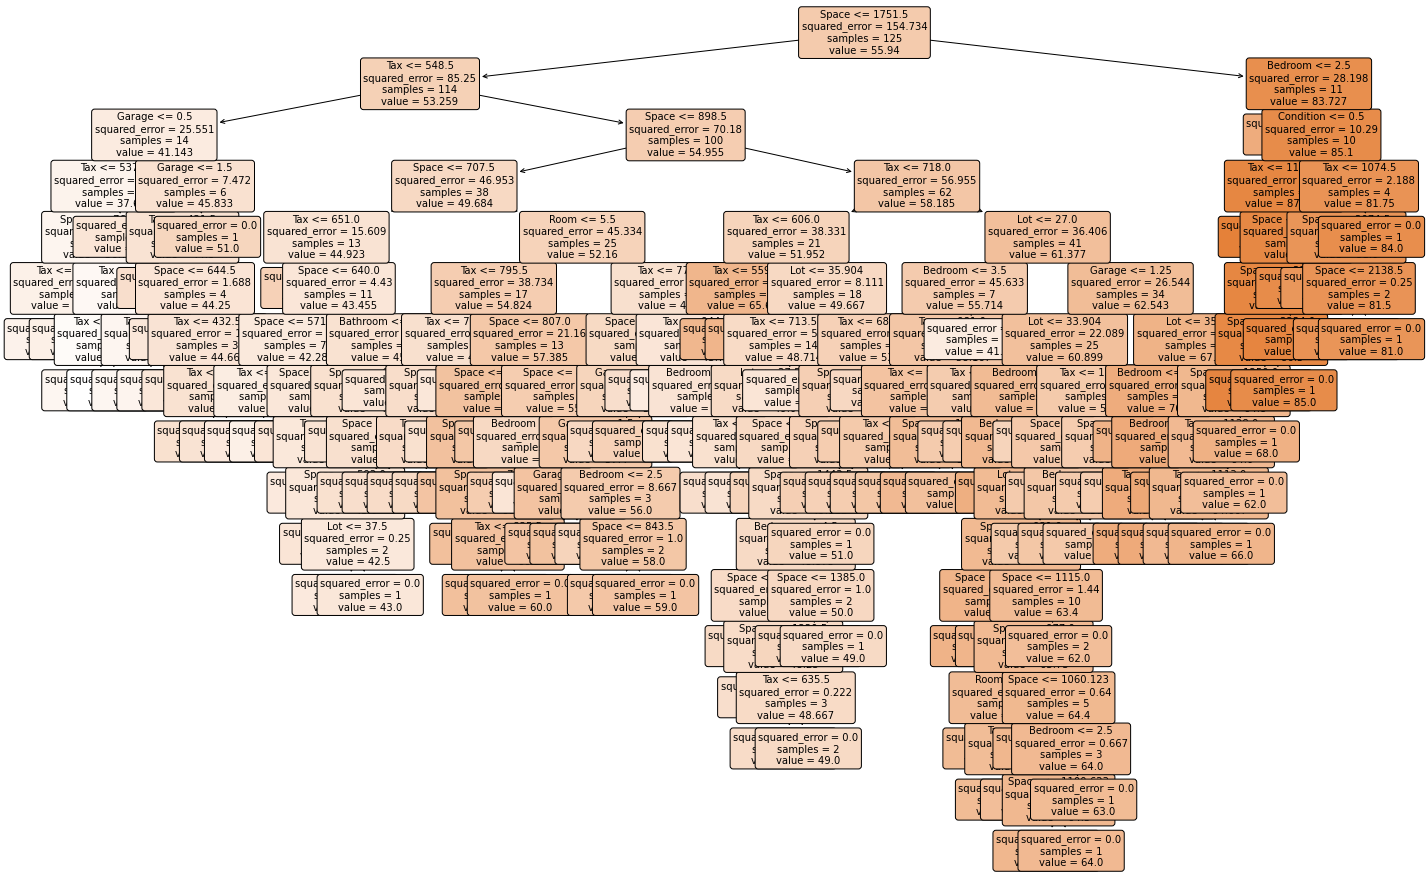

In [51]:

plt.figure(figsize=(24, 16))
plot_tree(tree_reg, filled=True, feature_names=xtrain.columns, rounded=True, fontsize=10)
plt.show()